# Indicadores Técnicos

¿Qué son los indicadores técnicos?

- Cálculos matemáticos basados en data histórica de mercado que 
- asumen que el mercado es eficiente en el sentido que los precios han incorporado toda la información pública disponible
- y ayudan a los operadores de mercado a entender los patrones pasados de comportamiento  y anticipar el comportamiento futuro de los precios.

Existen tres tipos principales de indicadores técnicos:

- Indicadores de tendencia: miden la dirección y fuerza de una tendencia en el precio.
  - Promedios móviles (MA por *moving average*), ADX (average directional movement index)
  
  
- Indicadores de momento (momentum): miden la velocidad del movimiento en el precio.
  - RSI (relative strength index)
  
  
- Indicadores de volatilidad: miden la magnitud de los movimientos en el precio.
  - Bandas de Bollinger

## La Librería TA-Lib (technical analysis library) 

Ver https://ta-lib.org/. Nosotros usaremos el wrapper en https://mrjbq7.github.io/ta-lib/.

In [4]:
import talib

## Indicadores de Promedio Móvil

- SMA: *simple moving average*, promedio móvil simple o aritmético.
- EMA: *exponential moving average*, el anterior pero pesando de forma distinta los datos que influyen en el promedio.

¿Para qué sirven?

- Suavizan el movimiento de los precios.
- Permiten visualizar eventuales tendencias en el precio.

Vamos a hacer ejemplos, para eso importamos data de precios.

In [1]:
import pandas_datareader.data as web
from datetime import date

In [2]:
start = date(2020, 1, 1)
end = date(2021, 9, 29)
ticker = 'AAPL'
data_source = 'yahoo'
apple_data = web.DataReader(ticker, data_source, start, end)

### SMA

$$SMA_n=\frac{\left(P_1+P_2+\cdots +P_n\right)}{n}$$

In [5]:
apple_data['SMA_corto'] = talib.SMA(apple_data['Close'], timeperiod=10)
apple_data['SMA_largo'] = talib.SMA(apple_data['Close'], timeperiod=50)

In [8]:
apple_data.head(15)

,High,Low,Open,Close,Volume,Adj Close,SMA_corto,SMA_largo
Date,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.096443,NaN,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.376083,NaN,NaN
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.960770,NaN,NaN
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.612930,NaN,NaN
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.797081,NaN,NaN
2020-01-09,77.607498,76.550003,76.809998,77.407501,170108400.0,76.385834,NaN,NaN
2020-01-10,78.167503,77.062500,77.650002,77.582497,140644800.0,76.558517,NaN,NaN
2020-01-13,79.267502,77.787498,77.910004,79.239998,121532000.0,78.194145,NaN,NaN
2020-01-14,79.392502,78.042503,79.175003,78.169998,161954400.0,77.138260,NaN,NaN


Veamos un gráfico de ambos indicadores.

In [10]:
import matplotlib.pyplot as plt

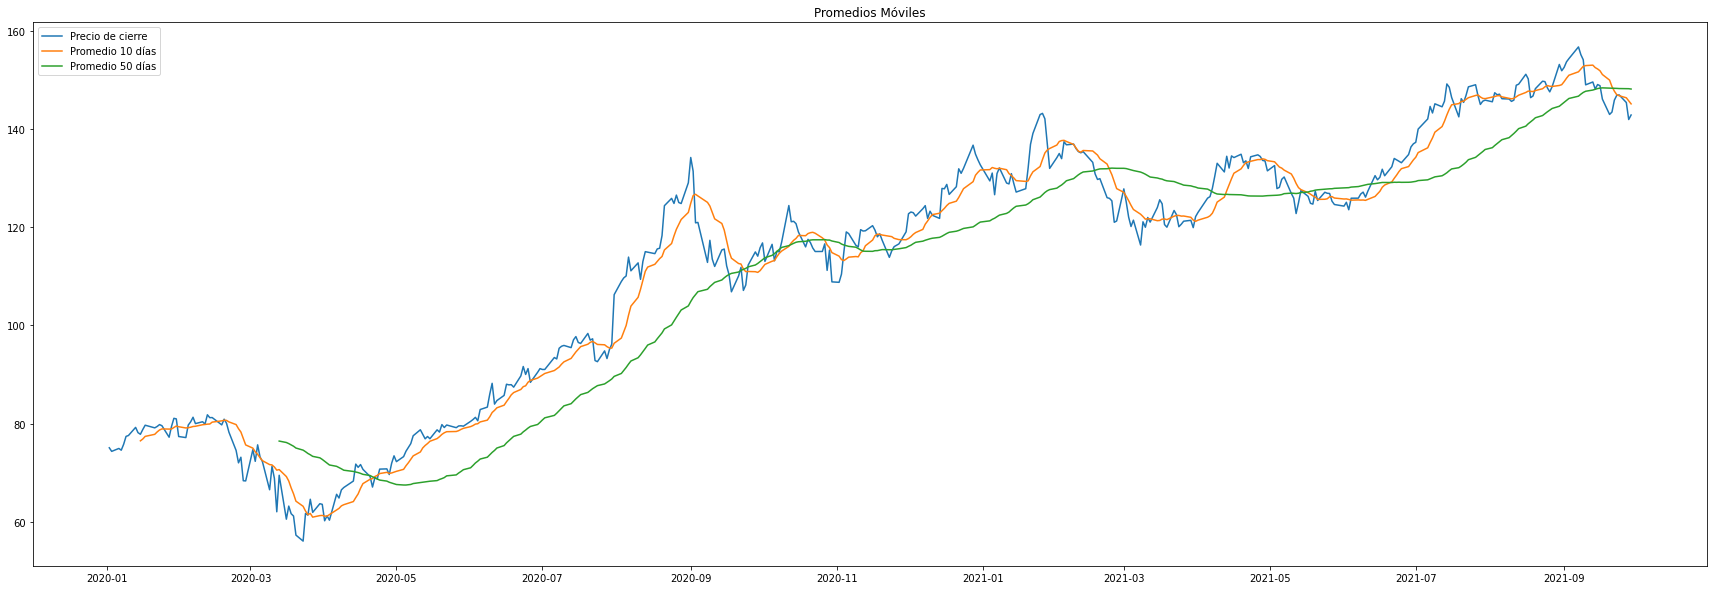

In [13]:
plt.plot(apple_data['Close'], label='Precio de cierre')
plt.plot(apple_data['SMA_corto'], label='Promedio 10 días')
plt.plot(apple_data['SMA_largo'], label='Promedio 50 días')
plt.legend()
plt.title('Promedios Móviles')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

### EMA

$$EMA_n=P_n\cdot \lambda + EMA_{n-1}\cdot\left(1-\lambda\right)$$

$$\lambda=\frac{2}{n+1}$$

In [14]:
apple_data['EMA_corto'] = talib.EMA(apple_data['Close'], timeperiod=10)
apple_data['EMA_largo'] = talib.EMA(apple_data['Close'], timeperiod=50)

In [15]:
apple_data.tail(15)

,High,Low,Open,Close,Volume,Adj Close,SMA_corto,SMA_largo,EMA_corto,EMA_largo
Date,,,,,,,,,,
2021-09-09,156.110001,153.949997,155.490005,154.070007,57305700.0,154.070007,152.742000,147.422600,153.105901,146.562423
2021-09-10,155.479996,148.699997,155.000000,148.970001,140646400.0,148.970001,152.885001,147.662800,152.353920,146.656838
2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.550003,152.980000,147.908400,151.844117,146.770295
2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,148.119995,152.480000,148.071600,151.167004,146.823225
2021-09-15,149.440002,146.369995,148.559998,149.029999,83281300.0,149.029999,152.200000,148.211800,150.778457,146.909765
2021-09-16,148.970001,147.220001,148.440002,148.789993,68034100.0,148.789993,151.828000,148.296200,150.416918,146.983499
2021-09-17,148.820007,145.759995,148.820007,146.059998,129728700.0,146.059998,151.069000,148.352599,149.624751,146.947283
2021-09-20,144.839996,141.270004,143.800003,142.940002,123478900.0,142.940002,149.933000,148.309200,148.409342,146.790135
2021-09-21,144.600006,142.779999,143.929993,143.429993,75834000.0,143.429993,148.606999,148.287799,147.504006,146.658365


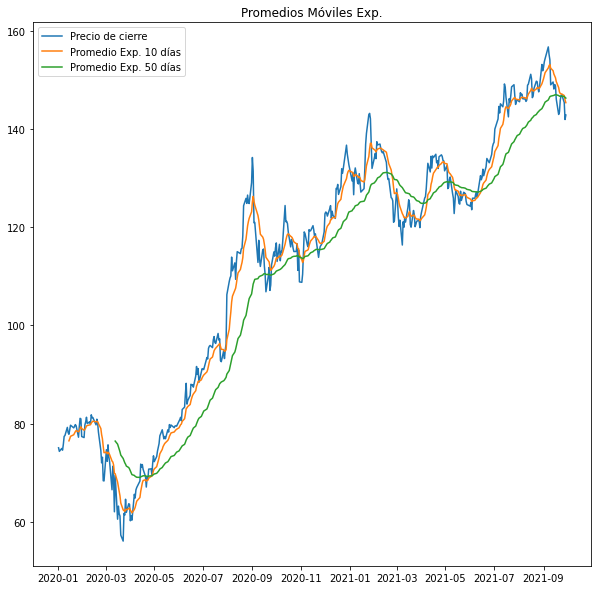

In [18]:
plt.plot(apple_data['Close'], label='Precio de cierre')
plt.plot(apple_data['EMA_corto'], label='Promedio Exp. 10 días')
plt.plot(apple_data['EMA_largo'], label='Promedio Exp. 50 días')
plt.legend()
plt.title('Promedios Móviles Exp.')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

### SMA vs EMA

El indicador EMA es más sensible a los movimientos recientes de precio.

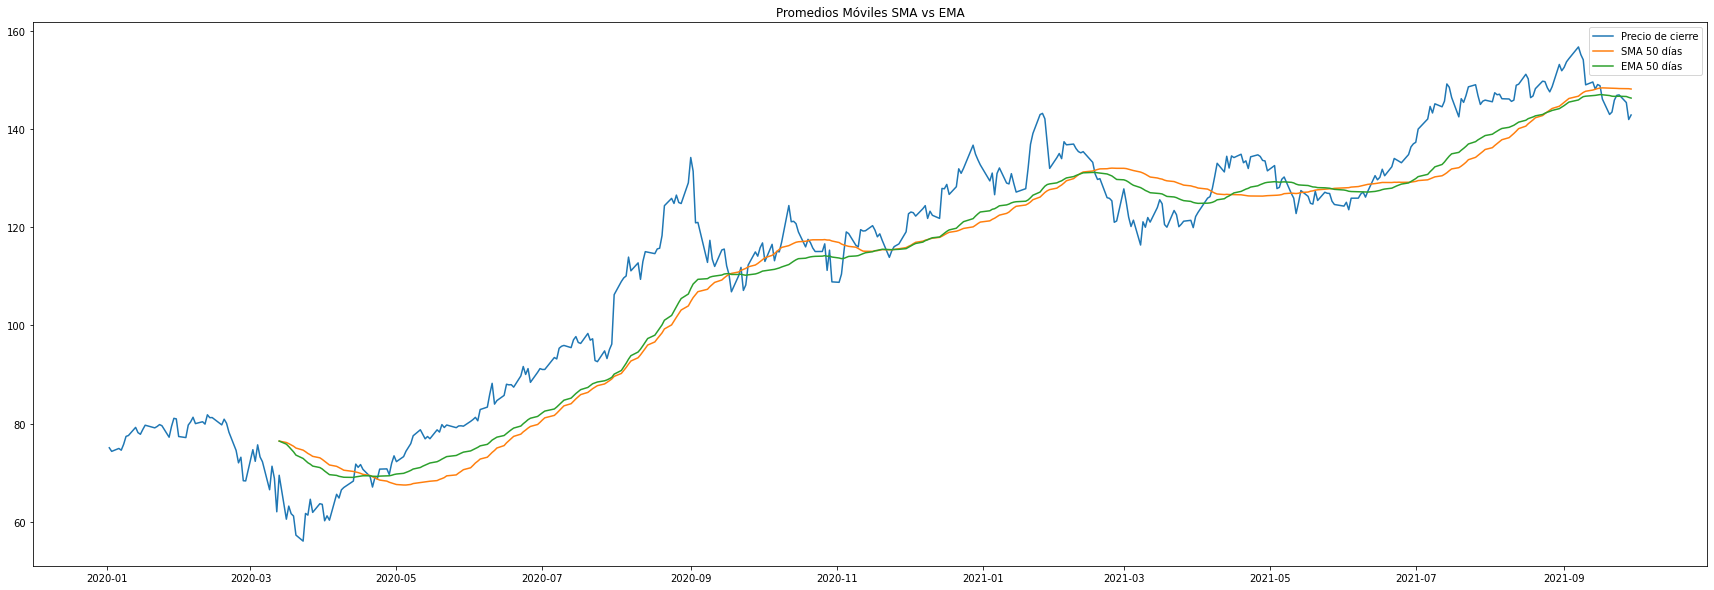

In [17]:
plt.plot(apple_data['Close'], label='Precio de cierre')
plt.plot(apple_data['SMA_largo'], label='SMA 50 días')
plt.plot(apple_data['EMA_largo'], label='EMA 50 días')
plt.legend()
plt.title('Promedios Móviles SMA vs EMA')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

### ADX (Average Directional Moving Index)

- Mide la fuerza de una tendencia
- No distingue si la tendencia es al alza o a la baja
- Oscila entre 0 y 100
- $ADX \le 25$: no hay tendencia
- $25 \lt ADX$: hay tendencia
- $50 \lt ADX$: fuerte tendencia 

¿Cómo se calcula? Ver https://en.wikipedia.org/wiki/Average_directional_movement_index.

- Se requiere una serie de tiempo de precios que tenga High, Low y CLose.

**Tarea**: Replicar los valores de ADX obtenidos con `talib`

In [19]:
apple_data['ADX'] = talib.ADX(
    apple_data['High'],
    apple_data['Low'],
    apple_data['Close'],
    timeperiod=14  # Mientras más corto este parámetro, 
                   # más sensible es el indicador.
)

In [23]:
apple_data.tail()

,High,Low,Open,Close,Volume,Adj Close,SMA_corto,SMA_largo,EMA_corto,EMA_largo,ADX
Date,,,,,,,,,,,
2021-09-23,147.080002,145.639999,146.649994,146.830002,64838200.0,146.830002,146.956999,148.2456,147.135410,146.634638,21.189490
2021-09-24,147.470001,145.559998,145.660004,146.919998,53434200.0,146.919998,146.751999,148.2144,147.096244,146.645829,20.991529
2021-09-27,145.960007,143.820007,145.470001,145.369995,74150700.0,145.369995,146.333998,148.1940,146.782381,146.595796,21.370981
2021-09-28,144.750000,141.690002,143.250000,141.910004,108972300.0,141.910004,145.712999,148.1832,145.896494,146.412040,22.318305
2021-09-29,144.449997,142.029999,142.470001,142.830002,74327788.0,142.830002,145.092999,148.1168,145.338950,146.271568,23.197963


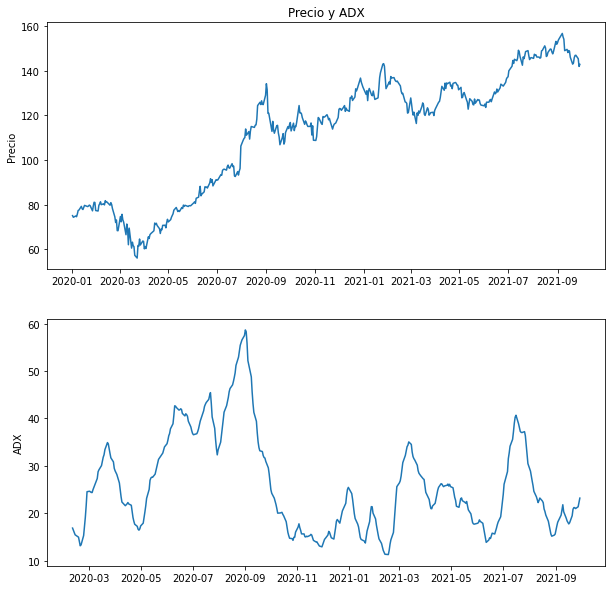

In [24]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.set_ylabel('Precio')
ax1.plot(apple_data['Close'])

ax2.set_ylabel('ADX')
ax2.plot(apple_data['ADX'])

ax1.set_title('Precio y ADX')
plt.show()

## Indicadores de Momento

### RSI

Mide el momento (momentum) de una tendencia.

- Oscila entre 0 y 100
- $RSI \gt 70$: sobrecompra, precio puede revertir a la baja
- $RSI \lt 30$: sobrevendido, precio puede revertir al alza

¿Cómo se calcula?

$$RSI=100-\frac{100}{1+RS}$$

Donde RS significa relative strength y:

$$RS=\frac{Promedio\space movimientos\space al\space alza}{Promedio\space movimientos\space a\space la\space baja}$$

In [60]:
apple_data['RSI'] = talib.RSI(apple_data['Close'], timeperiod=14)

In [61]:
apple_data.tail(15)

,High,Low,Open,Close,Volume,Adj Close,SMA_corto,SMA_largo,EMA_corto,EMA_largo,ADX,RSI
Date,,,,,,,,,,,,
2021-09-03,154.630005,153.089996,153.759995,154.300003,57808700.0,154.300003,150.923999,146.189600,151.445065,145.453974,18.110525,66.299277
2021-09-07,157.259995,154.389999,154.970001,156.690002,82278300.0,156.690002,151.621999,146.661200,152.398690,145.894603,19.612107,70.469926
2021-09-08,157.039993,153.979996,156.979996,155.110001,74420200.0,155.110001,152.170999,147.067800,152.891656,146.255991,20.758006,64.763801
2021-09-09,156.110001,153.949997,155.490005,154.070007,57305700.0,154.070007,152.742000,147.422600,153.105901,146.562423,21.803007,61.248285
2021-09-10,155.479996,148.699997,155.000000,148.970001,140646400.0,148.970001,152.885001,147.662800,152.353920,146.656838,20.332245,47.602188
2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.550003,152.980000,147.908400,151.844117,146.770295,18.966538,48.993996
2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,148.119995,152.480000,148.071600,151.167004,146.823225,18.396983,45.766210
2021-09-15,149.440002,146.369995,148.559998,149.029999,83281300.0,149.029999,152.200000,148.211800,150.778457,146.909765,18.061013,48.109051
2021-09-16,148.970001,147.220001,148.440002,148.789993,68034100.0,148.789993,151.828000,148.296200,150.416918,146.983499,17.749041,47.525920


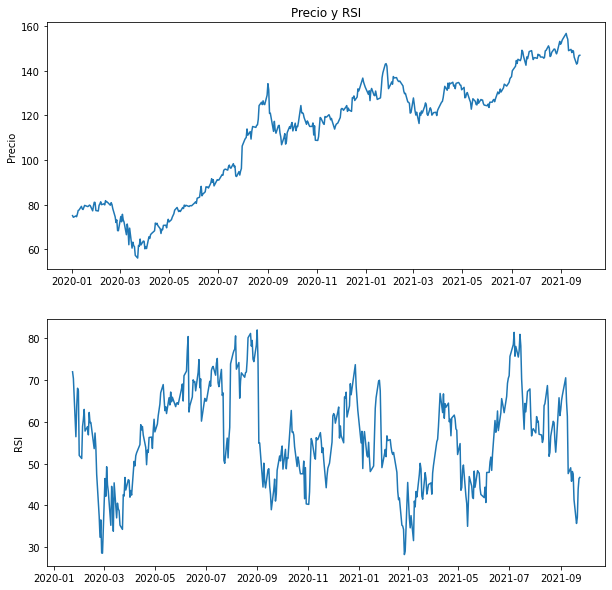

In [62]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.set_ylabel('Precio')
ax1.plot(apple_data['Close'])
ax2.set_ylabel('RSI')
ax2.plot(apple_data['RSI'])
ax1.set_title('Precio y RSI')
plt.show()

## Indicadores de Volatilidad

### BB (Bandas de Bollinger)

- Miden volatilidad de precio
- Indicador compuesto por 3 líneas:
  - Línea central: es un $SMA_n$
  - Línea superior: $k\cdot\sigma$ por sobre la línea central. Aquí $\sigma$ es la desviación estándar del precio.
  - Línea inferior: $k\cdot\sigma$ por debajo la línea central.
- Mientras más ancha es la banda entre la línea central y la línea superior o inferior, más volátiles son los precios.
- Busca medir si el precio está alto o bajo respecto a la media móvil.

In [63]:
upper, mid, lower = talib.BBANDS(
    apple_data['Close'],
    nbdevup=2,
    nbdevdn=2,
    timeperiod=20
)

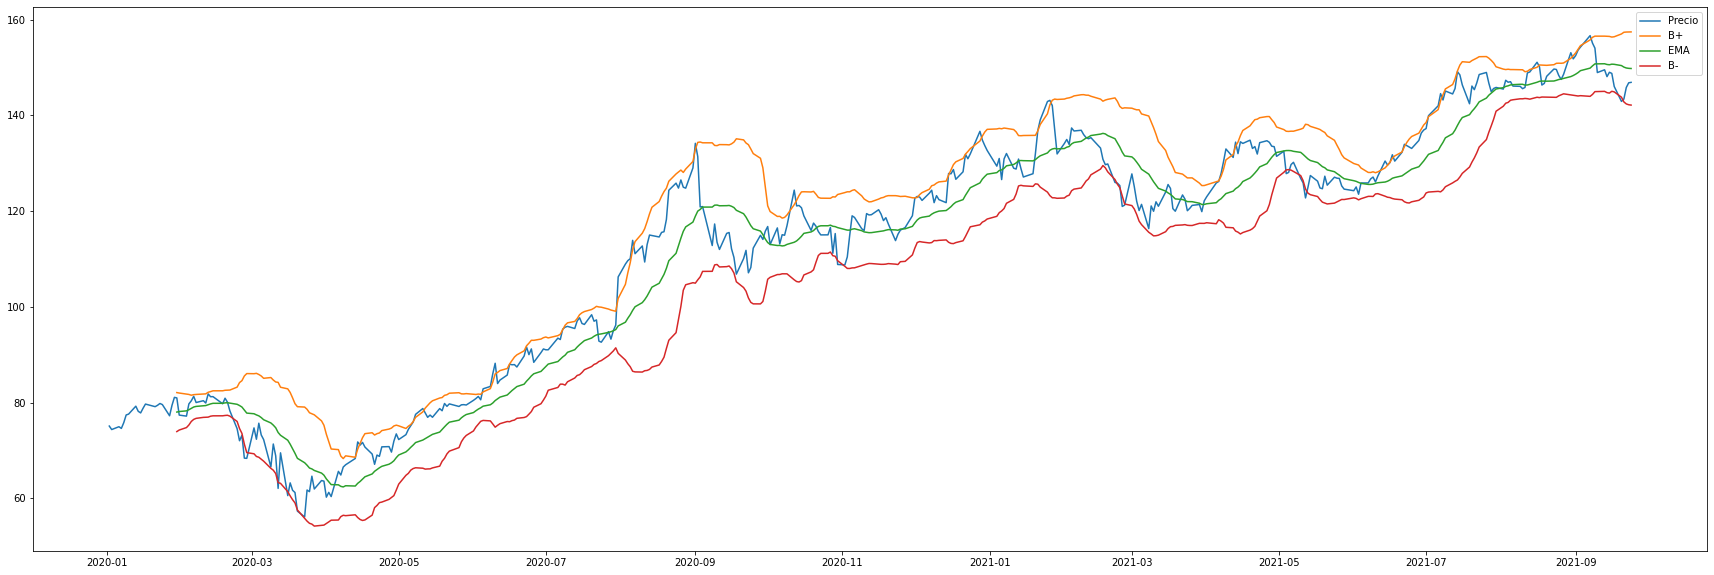

In [67]:
plt.plot(apple_data['Close'], label='Precio')
plt.plot(upper, label='B+')
plt.plot(mid, label='EMA')
plt.plot(lower, label='B-')
plt.legend()
plt.rcParams["figure.figsize"] = (30,20)
plt.show()